In [2]:
import torch

In [7]:
torch.Tensor(5, 3)  # default tensor type torch.FloatTensor


 4.1826e+37  4.5821e-41  4.1826e+37
 4.5821e-41  1.3566e-19  6.7331e+22
 1.1866e+27  7.2054e+22  4.7428e+30
 3.0881e+29  7.5554e+28  5.2839e-11
 2.7604e+20  1.7744e+28  1.1673e-32
[torch.FloatTensor of size 5x3]

In [10]:
x = torch.rand(5,3)

In [11]:
x


 0.2721  0.2934  0.6227
 0.1364  0.0599  0.3168
 0.9294  0.1632  0.7508
 0.5921  0.2347  0.4857
 0.4279  0.8212  0.2970
[torch.FloatTensor of size 5x3]

In [14]:
x.size()

torch.Size([5, 3])

In [15]:
y = torch.rand(5,3)

In [16]:
x + y


 0.5101  0.3461  1.2319
 0.7584  0.4452  0.6434
 1.0847  0.6306  0.9862
 1.3632  0.9636  1.1459
 0.9506  1.3990  0.5265
[torch.FloatTensor of size 5x3]

In [17]:
torch.add(x, y)


 0.5101  0.3461  1.2319
 0.7584  0.4452  0.6434
 1.0847  0.6306  0.9862
 1.3632  0.9636  1.1459
 0.9506  1.3990  0.5265
[torch.FloatTensor of size 5x3]

In [18]:
y.add(x)


 0.5101  0.3461  1.2319
 0.7584  0.4452  0.6434
 1.0847  0.6306  0.9862
 1.3632  0.9636  1.1459
 0.9506  1.3990  0.5265
[torch.FloatTensor of size 5x3]

In [20]:
x[:, -1]


 0.6227
 0.3168
 0.7508
 0.4857
 0.2970
[torch.FloatTensor of size 5]

### numpy

In [30]:
a = torch.ones(5)
a


 1
 1
 1
 1
 1
[torch.FloatTensor of size 5]

In [32]:
b = a.numpy()  # just a numpy array view

In [33]:
a.add_(1)  # inplace add
print(a)
print(b)


 2
 2
 2
 2
 2
[torch.FloatTensor of size 5]

[ 2.  2.  2.  2.  2.]


In [34]:
import numpy as np

In [35]:
a = np.ones(5)
b = torch.from_numpy(a)

np.add(a, 1, out=a)
print(a, b)

[ 2.  2.  2.  2.  2.] 
 2
 2
 2
 2
 2
[torch.DoubleTensor of size 5]



`torch.Tensor <--> ndarray` are just views, side effects will change both of them

### CUDA

In [36]:
torch.cuda.is_available()

True

In [93]:
x = torch.randn(4000,4000)

In [97]:
%%timeit
e = x.eig()

1 loop, best of 3: 9.97 s per loop


In [95]:
y = torch.randn(4000, 4000).cuda()

In [98]:
%%timeit
ee = y.eig()

1 loop, best of 3: 4.17 s per loop


###  Autograd
> kind of new for me.

In [99]:
from torch.autograd import Variable

In [100]:
x = Variable(torch.ones(2, 2), requires_grad=True)
x

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

In [101]:
y = x + 2
y

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]

In [102]:
y.creator

In [103]:
z = y*y*3
z

Variable containing:
 27  27
 27  27
[torch.FloatTensor of size 2x2]

In [104]:
out = z.mean()
out

Variable containing:
 27
[torch.FloatTensor of size 1]

In [105]:
out.backward()

In [112]:
x.grad

Variable containing:
 4.5000  4.5000
 4.5000  4.5000
[torch.FloatTensor of size 2x2]

***

In [125]:
x = torch.randn(3)
x = Variable(x, requires_grad=True)

In [126]:
y = x * 2

In [127]:
y

Variable containing:
 0.2127
 2.4445
 1.4245
[torch.FloatTensor of size 3]

In [133]:
y.data.norm()

2.8372268382698747

In [131]:
(y**2).sum().sqrt()

Variable containing:
 2.8372
[torch.FloatTensor of size 1]

In [134]:
while y.data.norm() < 1000:
    y = y * 2

In [135]:
y

Variable containing:
  108.8848
 1251.5791
  729.3253
[torch.FloatTensor of size 3]

In [136]:
grad = torch.FloatTensor([0.1, 1.0, 1e-4])
y.backward(grad)

In [140]:
x.grad

Variable containing:
  102.4000
 1024.0000
    0.1024
[torch.FloatTensor of size 3]

### NN

In [141]:
import torch.nn as nn
import torch.nn.functional as F

In [245]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(5*5*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, int(np.prod(x.size()[1:])))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        return x

In [246]:
net = LeNet()

In [247]:
params = list(net.parameters())
print(len(params))
params[0].size()

10


torch.Size([6, 1, 5, 5])

In [248]:
input = Variable(torch.randn(1, 1, 32, 32))
out = net(input)
out

Variable containing:
 0.1035  0.0000  0.0000  0.0187  0.0453  0.1003  0.1167  0.0000  0.0000  0.0070
[torch.FloatTensor of size 1x10]

***

In [249]:
output = net(input)
target = Variable(torch.range(1,10))
criterion = nn.MSELoss()
loss = criterion(out, target)
loss

Variable containing:
 38.1248
[torch.FloatTensor of size 1]

In [250]:
loss.creator

In [251]:
loss.creator.previous_functions[0][0]

In [252]:
loss.creator.previous_functions[0][0].previous_functions[0][0]

In [253]:
net.zero_grad()

In [254]:
net.conv1.bias.grad

Variable containing:
 0
 0
 0
 0
 0
 0
[torch.FloatTensor of size 6]

In [255]:
loss.backward()

In [256]:
net.conv1.bias.grad

Variable containing:
1.00000e-02 *
  1.7619
  5.2804
 -0.6227
  4.4630
 -3.0185
 -6.7047
[torch.FloatTensor of size 6]

***

In [258]:
import torch.optim as optim

In [259]:
optimizer = optim.SGD(net.parameters(), lr=1e-2)

In [260]:
optimizer.zero_grad()
output = net(input)
loss = criterion(output, target)
loss.backward()

In [261]:
optimizer.step()

### CIFAR 10

In [262]:
import torchvision
import torchvision.transforms as transforms

In [265]:
transform=transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                             ])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, 
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, 
                                          shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting tar file
Done!
Files already downloaded and verified


In [274]:
# functions to show an image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))

truck   dog plane  ship


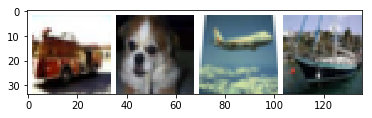

In [267]:
# show some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s'%classes[labels[j]] for j in range(4)))

In [270]:
class LuNet(nn.Module):
    def __init__(self):
        super(LuNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(5*5*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, int(np.prod(x.size()[1:])))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        return x

In [290]:
net = LuNet()

In [291]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [292]:
for epoch in range(2): # loop over the dataset multiple times
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        
        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()        
        optimizer.step()
        
        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999: # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch+1, i+1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')

[1,  2000] loss: 2.218
[1,  4000] loss: 2.104
[1,  6000] loss: 2.077
[1,  8000] loss: 2.030
[1, 10000] loss: 2.031
[1, 12000] loss: 1.993
[2,  2000] loss: 1.984
[2,  4000] loss: 1.969
[2,  6000] loss: 1.942
[2,  8000] loss: 1.881
[2, 10000] loss: 1.885
[2, 12000] loss: 1.860
Finished Training


GroundTruth:    cat  ship  ship plane


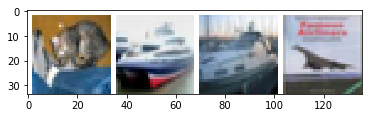

In [275]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s'%classes[labels[j]] for j in range(4)))

In [283]:
outputs = net(Variable(images))

In [284]:
_, pred = torch.max(outputs.data, 1)
print('Predicted: ', ' '.join('%5s'% classes[pred[j][0]] for j in range(4)))

Predicted:    cat   car   car plane


In [285]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 46 %
